In [50]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,KFold, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from knn_imp import KNNTO
from sklearn.datasets import load_wine

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
iris = datasets.load_wine()
classes_names = iris.target_names
X = pd.DataFrame(iris.data, columns=iris["feature_names"])
y = pd.DataFrame(iris.target, columns=["class"])
# y = pd.Series(iris.target)
df = pd.concat([X,y], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


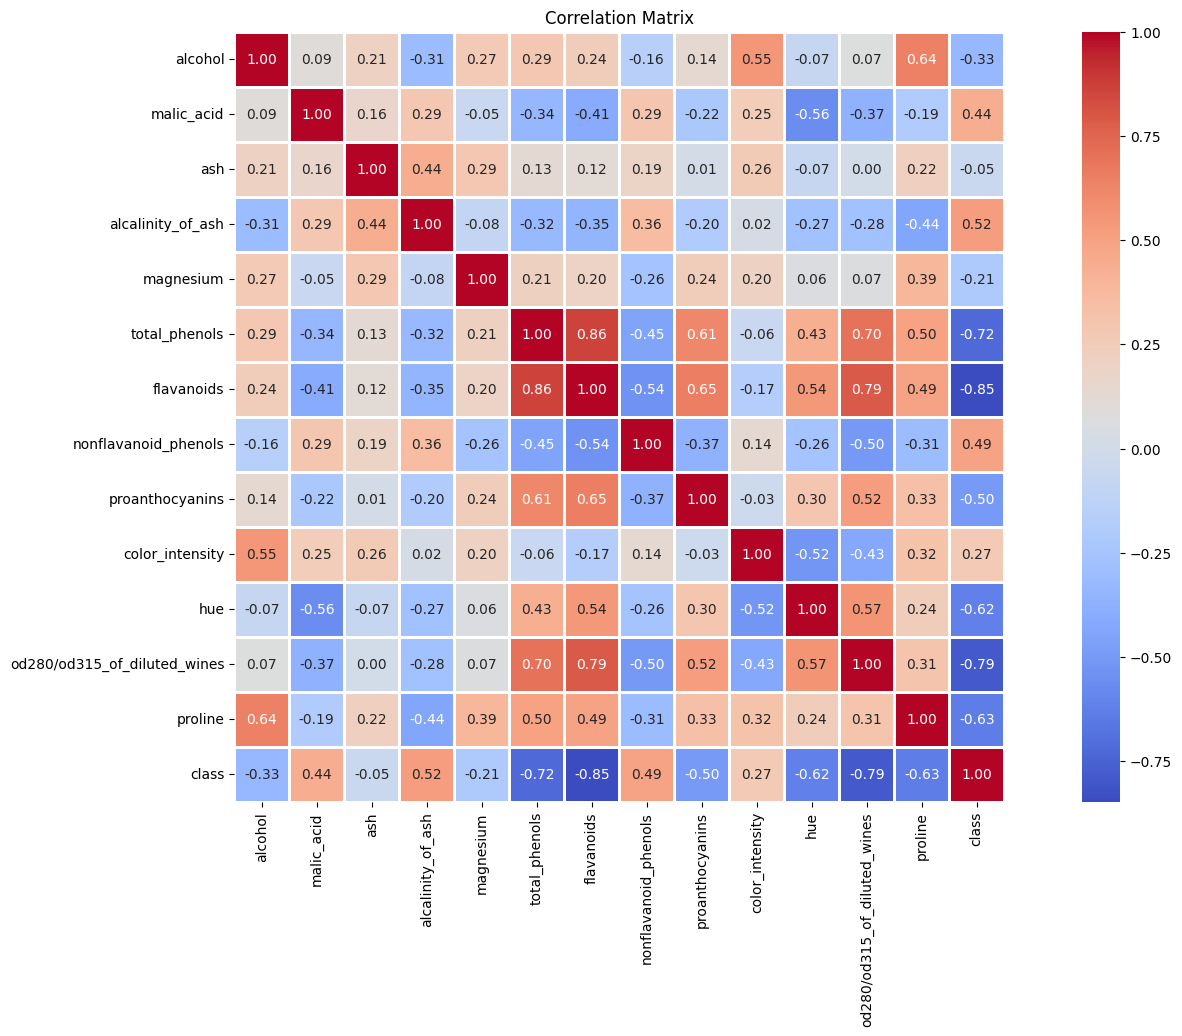

In [34]:
# corr = pd.concat([X_train,y_train], axis=1).corr()
fig, ax = plt.subplots(figsize=(20,10))
corr = df.corr()
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=1, ax=ax)
ax.set_title("Correlation Matrix")
plt.show()

<Axes: xlabel='flavanoids', ylabel='class'>

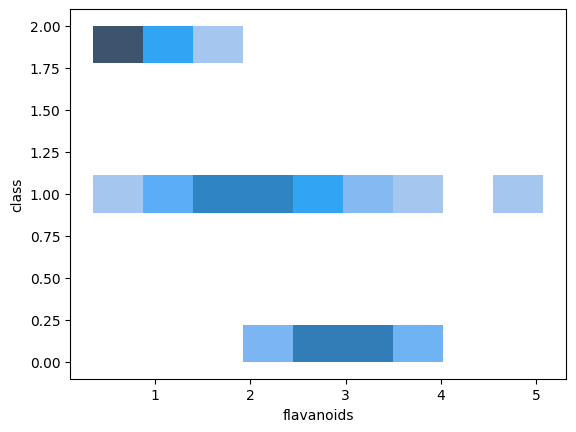

In [40]:
sns.histplot(data=df, x="flavanoids", y="class")

In [51]:
# kf = KFold(n_splits=10)
kf = RepeatedKFold(n_splits=10, n_repeats=5)
pipeline1 = make_pipeline(
    PolynomialFeatures(degree=2),  # Add polynomial features
    LogisticRegression(solver="liblinear",max_iter=1000)# Logistic regression classifier
)

clfs = [("logistic", LogisticRegression(max_iter=500)),
 ("tree", DecisionTreeClassifier()), 
 ("knn", KNeighborsClassifier(11)),
  ("pipeline", pipeline1),
  ("random forest", RandomForestClassifier(100))
  ]
avg_scores = {}
for name, clf in clfs:
    scores = cross_val_score(clf, X, y.values.ravel(), cv=kf)

    avg_scores[name] = np.mean(scores)

print(avg_scores)

C:\Users\Ron Tohar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ron Tohar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

{'logistic': 0.950326797385621, 'tree': 0.9069281045751633, 'knn': 0.7086928104575162, 'pipeline': 0.9393464052287581, 'random forest': 0.9822222222222223}
